In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import cbook as cbook
from matplotlib.pyplot import figure

pd.options.mode.chained_assignment = None

In [2]:
#LOAD DATA and CONVERT to DataFrame

coronaTable = pd.read_csv('all-states-history.csv')
coronaFrame = pd.DataFrame(coronaTable)

In [3]:
#Create State-Level DATA FRAMES

massFilter = (coronaFrame['state'] == 'MA')
ctFilter = (coronaFrame['state'] == 'CT')
riFilter = (coronaFrame['state'] == 'RI')
nhFilter= (coronaFrame['state'] == 'NH')
meFilter = (coronaFrame['state'] == 'ME')
vtFilter = (coronaFrame['state'] == 'VT')

massFrame = coronaFrame[massFilter]
ctFrame = coronaFrame[ctFilter]
riFrame = coronaFrame[riFilter]
nhFrame = coronaFrame[nhFilter]
meFrame = coronaFrame[meFilter]
vtFrame = coronaFrame[vtFilter]

In [4]:
#DATA FILTERS

#Massachusetts

casesFilterMA = ((massFrame['positiveIncrease'] > 0) & (massFrame['positiveIncrease'] != 3840))
massFrame = massFrame[casesFilterMA]
massFrame.sort_values('date', inplace=True)

#Connecticut

casesFilterCT = (ctFrame['positiveIncrease'] > 0)
ctAveragesFrame = ctFrame
ctFrame.sort_values('date', inplace=True)
ctAveragesFrame.sort_values('date', inplace=True)

#Rhode Island

riFrame.sort_values('date', inplace=True)

#New Hampshire

nhFrame.sort_values('date', inplace=True)

#Maine

meFrame.sort_values('date', inplace=True)

#Vermont

vtFrame.sort_values('date', inplace=True)

In [5]:
#CREATE THE VARIABLES

#Massachusetts

dateMA = massFrame['date']
newCasesMA = massFrame['positiveIncrease']
newIndividualsTestedMA = massFrame['totalTestsPeopleViralIncrease']
currentHospitalizationsMA = massFrame['hospitalizedCurrently']
dailyNewDeathsMA = massFrame['deathIncrease']

massFrame['pctIndividualsPositive'] = newCasesMA / newIndividualsTestedMA
pctIndividualsPositiveMA = massFrame['pctIndividualsPositive'] * 100

massFrame['longMovingAvg'] = massFrame.positiveIncrease.rolling(7, min_periods=7).mean()
massFrame['hospitalizedMovingAvg'] = massFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
massFrame['dailyDeathsMovingAvg'] = massFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgMA = massFrame['longMovingAvg']
hospitalizedMovingAvgMA = massFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgMA = massFrame['dailyDeathsMovingAvg']

#Connecticut

dateCT = ctFrame['date']
newCasesCT = ctFrame['positiveIncrease']
newIndividualsTestedCT = ctFrame['totalTestsPeopleViralIncrease']
currentHospitalizationsCT = ctFrame['hospitalizedCurrently']
dailyNewDeathsCT = ctFrame['deathIncrease']

newCasesInclusiveCT = ctAveragesFrame['positiveIncrease']
newIndividualsTestedInclusiveCT = ctAveragesFrame['totalTestsViralIncrease']
currentHospitalizationsInclusiveCT = ctAveragesFrame['hospitalizedCurrently']
dailyNewDeathsInclusiveCT = ctAveragesFrame['deathIncrease']

ctAveragesFrame['pctIndividualsPositive'] = newCasesInclusiveCT / newIndividualsTestedInclusiveCT
pctIndividualsPositiveInclusiveCT = ctAveragesFrame['pctIndividualsPositive'] * 100

pctIndividualsPositiveInclusiveCT_filtered = pctIndividualsPositiveInclusiveCT[pctIndividualsPositiveInclusiveCT > 10]

ctAveragesFrame['longMovingAvg'] = ctFrame.positiveIncrease.rolling(7, min_periods=7).mean()
ctAveragesFrame['hospitalizedMovingAvg'] = ctFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
ctAveragesFrame['dailyDeathsMovingAvg'] = ctFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgCT  = ctAveragesFrame['longMovingAvg']
hospitalizedMovingAvgCT = ctAveragesFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgCT = ctAveragesFrame['dailyDeathsMovingAvg']

#Rhode Island

dateRI = riFrame['date']
newCasesRI = riFrame['positiveIncrease']
newIndividualsTestedRI = riFrame['totalTestsPeopleViralIncrease']
newTotalTestsRI = riFrame['totalTestsViralIncrease']
currentHospitalizationsRI = riFrame['hospitalizedCurrently']
dailyNewDeathsRI = riFrame['deathIncrease']

riFrame['pctIndividualsPositive'] = newCasesRI / newIndividualsTestedRI
pctIndividualsPositiveRI = newCasesRI / newIndividualsTestedRI
pctIndividualsPositiveRI = (pctIndividualsPositiveRI * 100)

riFrame['longMovingAvg'] = riFrame.positiveIncrease.rolling(7, min_periods=7).mean()
riFrame['hospitalizedMovingAvg'] = riFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
riFrame['dailyDeathsMovingAvg'] = riFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgRI  = riFrame['longMovingAvg']
hospitalizedMovingAvgRI = riFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgRI = riFrame['dailyDeathsMovingAvg']

#New Hampshire

dateNH = nhFrame['date']
newCasesNH = nhFrame['positiveIncrease']
newIndividualsTestedNH = nhFrame['totalTestsPeopleViralIncrease']
currentHospitalizationsNH = nhFrame['hospitalizedCurrently']
dailyNewDeathsNH = nhFrame['deathIncrease']

nhFrame['pctIndividualsPositive'] = newCasesNH / newIndividualsTestedNH
pctIndividualsPositiveNH = newCasesNH / newIndividualsTestedNH
pctIndividualsPositiveNH = (pctIndividualsPositiveNH * 100)

nhFrame['longMovingAvg'] = nhFrame.positiveIncrease.rolling(7, min_periods=7).mean()
nhFrame['hospitalizedMovingAvg'] = nhFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
nhFrame['dailyDeathsMovingAvg'] = nhFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgNH  = nhFrame['longMovingAvg']
hospitalizedMovingAvgNH = nhFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgNH = nhFrame['dailyDeathsMovingAvg']


#Maine

dateME = meFrame['date']
newCasesME = meFrame['positiveIncrease']
newIndividualsTestedME = meFrame['totalTestsPeopleViralIncrease']
currentHospitalizationsME = meFrame['hospitalizedCurrently']
dailyNewDeathsME = meFrame['deathIncrease']

meFrame['pctIndividualsPositive'] = newCasesME / newIndividualsTestedME
pctIndividualsPositiveME = newCasesME / newIndividualsTestedME

meFrame['longMovingAvg'] = meFrame.positiveIncrease.rolling(7, min_periods=7).mean()
meFrame['hospitalizedMovingAvg'] = meFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
meFrame['dailyDeathsMovingAvg'] = meFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgME = meFrame['longMovingAvg']
hospitalizedMovingAvgME = meFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgME = meFrame['dailyDeathsMovingAvg']

#Vermont

dateVT = vtFrame['date']
newCasesVT = vtFrame['positiveIncrease']
newIndividualsTestedVT = vtFrame['totalTestsPeopleViralIncrease']
currentHospitalizationsVT = vtFrame['hospitalizedCurrently']
dailyNewDeathsVT = vtFrame['deathIncrease']

vtFrame['pctIndividualsPositive'] = newCasesVT / newIndividualsTestedVT
pctIndividualsPositiveVT = newCasesVT / newIndividualsTestedVT

vtFrame['longMovingAvg'] = vtFrame.positiveIncrease.rolling(7, min_periods=7).mean()
vtFrame['hospitalizedMovingAvg'] = vtFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
vtFrame['dailyDeathsMovingAvg'] = vtFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgVT = vtFrame['longMovingAvg']
hospitalizedMovingAvgVT = vtFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgVT = vtFrame['dailyDeathsMovingAvg']

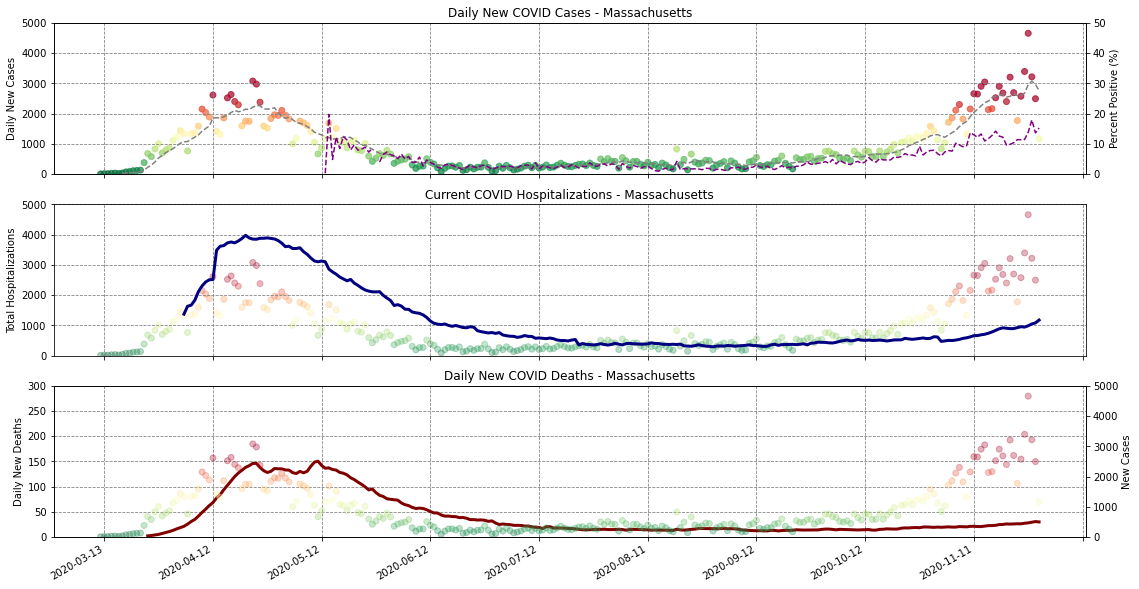

In [12]:
#GENERATE THE DASHBOARD -- MASSACHUSETTS

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax4 = ax1.twinx()
ax5 = ax3.twinx()

cmap=mpl.cm.RdYlGn_r
norm=mpl.colors.Normalize(vmin=0, vmax=2500)

ax1.scatter(dateMA, newCasesMA, c=newCasesMA, cmap=cmap, norm=norm, alpha=0.7, label='Daily New Cases')
ax1.plot(dateMA, longMovingAvgMA, linestyle='--', c='grey', label='7-Day Moving Average')
ax4.plot(dateMA, pctIndividualsPositiveMA, linestyle="--", c='purple')

ax2.plot(dateMA, currentHospitalizationsMA, linewidth=3, color='navy', label="Currently Hospitalized Patients with COVID-19 (MA)")
ax2.scatter(dateMA, newCasesMA, c=newCasesMA, cmap=cmap, norm=norm, alpha=0.3)

ax3.plot(dateMA, dailyDeathMovingAvgMA, linewidth=3, color='maroon', label="Daily COVID-19 Deaths (MA)")
ax5.scatter(dateMA, newCasesMA, c=newCasesMA, cmap=cmap, norm=norm, alpha=0.3)

ax1.grid(True, linestyle='--', color='grey')
ax2.grid(True, linestyle='--', color='grey')
ax3.grid(True, linestyle='--', color='grey')

ax1.set_title("Daily New COVID Cases - Massachusetts")
ax2.set_title("Current COVID Hospitalizations - Massachusetts")
ax3.set_title("Daily New COVID Deaths - Massachusetts")

ax1.set_ylabel("Daily New Cases")
ax4.set_ylabel("Percent Positive (%)")
ax2.set_ylabel("Total Hospitalizations")
ax3.set_ylabel("Daily New Deaths")
ax5.set_ylabel("New Cases")

plt.gca().xaxis.set_major_locator(mpl_dates.DayLocator(interval=30))
fig.autofmt_xdate()

ax1.set_ylim(0,5000)
ax2.set_ylim(0,5000)
ax3.set_ylim(0,300)
ax4.set_ylim(0,50)
ax5.set_ylim(0,5000)

fig.set_size_inches(18.5, 10.5)

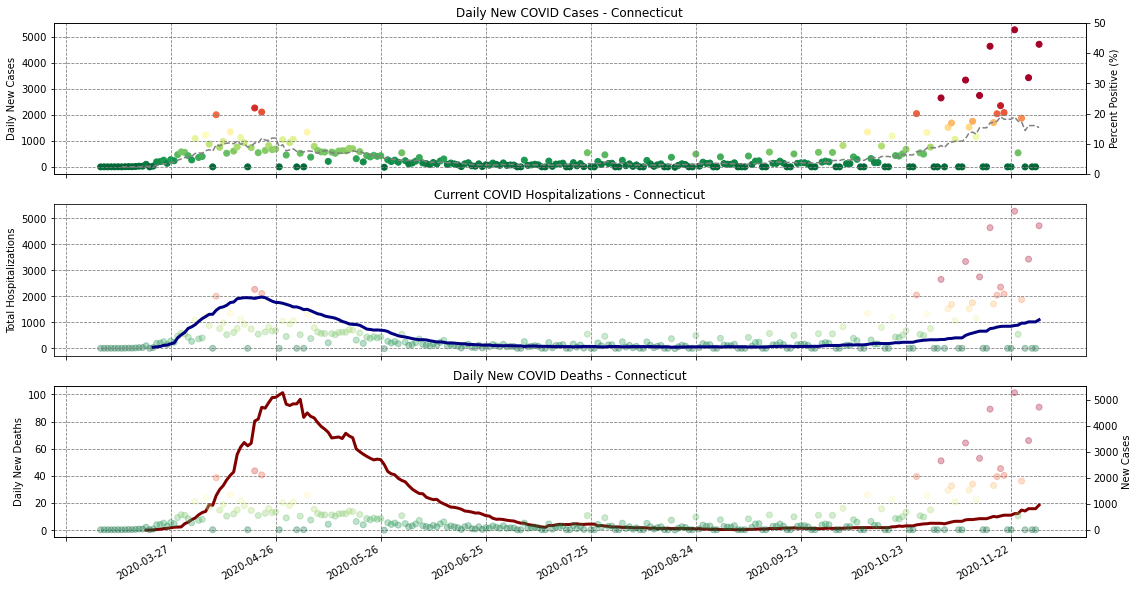

In [7]:
#GENERATE THE DASHBOARD - CONNECTICUT

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax4 = ax1.twinx()
ax5 = ax3.twinx()

cmap=mpl.cm.RdYlGn_r
norm=mpl.colors.Normalize(vmin=0, vmax=2500)

ax1.scatter(dateCT, newCasesCT, c=newCasesCT, cmap=cmap, norm=norm)
ax1.plot(dateCT, longMovingAvgCT, c='grey', linestyle='--', label="7-Day Moving Average")

ax2.plot(dateCT, currentHospitalizationsCT, linewidth=3, color='navy', label="Currently Hospitalized Patients with COVID19 (CT)")
ax2.scatter(dateCT, newCasesCT, c=newCasesCT, cmap=cmap, norm=norm, alpha=0.3)

ax3.plot(dateCT, dailyDeathMovingAvgCT, linewidth=3, color='maroon', label="Daily COVID-19 Deaths (CT)")
ax5.scatter(dateCT, newCasesCT, c=newCasesCT, cmap=cmap, norm=norm, alpha=0.3)

##ADD IN POSITIVITY MOVING AVERAGE##

ax1.grid(True, linestyle='--', color='grey')
ax2.grid(True, linestyle='--', color='grey')
ax3.grid(True, linestyle='--', color='grey')

ax1.set_title("Daily New COVID Cases - Connecticut")
ax2.set_title("Current COVID Hospitalizations - Connecticut")
ax3.set_title("Daily New COVID Deaths - Connecticut")

ax1.set_ylabel("Daily New Cases")
ax4.set_ylabel("Percent Positive (%)")
ax2.set_ylabel("Total Hospitalizations")
ax3.set_ylabel("Daily New Deaths")
ax5.set_ylabel("New Cases")

plt.gca().xaxis.set_major_locator(mpl.dates.DayLocator(interval=30))
fig.autofmt_xdate()

ax4.set_ylim(0,50)

fig.set_size_inches(18.5, 10.5)

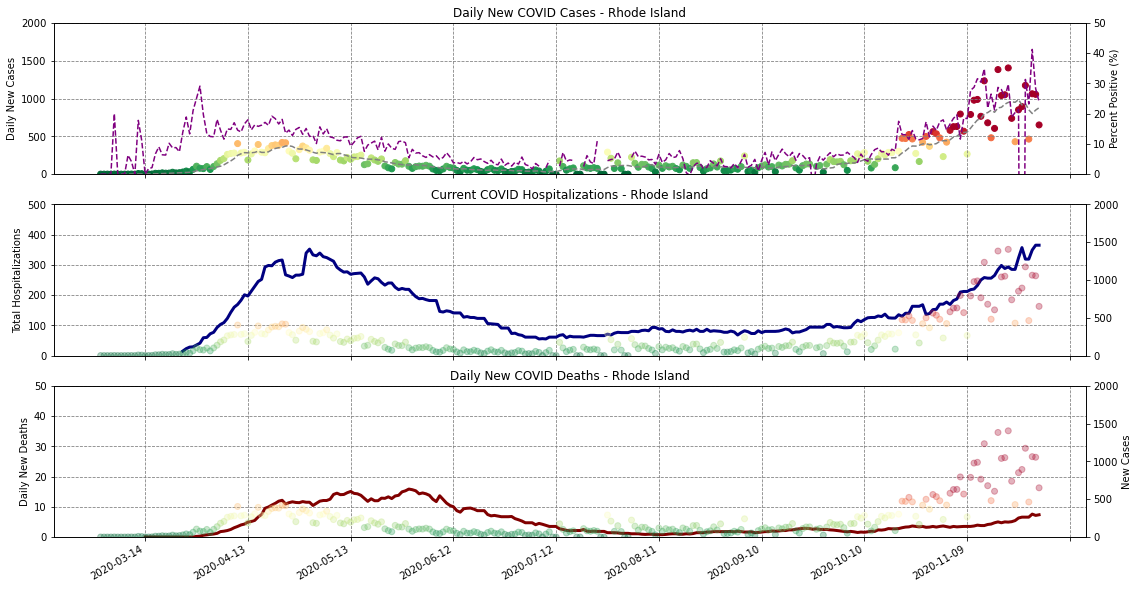

In [18]:
#GENERATE THE DASHBOARAD -- RHODE ISLAND

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax4 = ax1.twinx()
ax5 = ax3.twinx()
ax6 = ax2.twinx()

cmap=mpl.cm.RdYlGn_r
norm=mpl.colors.Normalize(vmin=0, vmax=600)

ax1.scatter(dateRI, newCasesRI, c=newCasesRI, cmap=cmap, norm=norm, label="Daily New Coronavirus Cases (RI)")
ax1.plot(dateRI, longMovingAvgRI, c='grey', linestyle='--', label="7-Day Moving Average")
ax4.plot(dateRI, pctIndividualsPositiveRI, linestyle='--', color='purple')

ax2.plot(dateRI, currentHospitalizationsRI, linewidth=3, color='navy', label="Currently Hospitalized Patients with COVID19 (RI)")
ax6.scatter(dateRI, newCasesRI, c=newCasesRI, cmap=cmap, norm=norm, alpha=0.3)

ax3.plot(dateRI, dailyDeathMovingAvgRI, linewidth=3, color='maroon', label="Daily COVID-19 Deaths (RI)")
ax5.scatter(dateRI, newCasesRI, c=newCasesRI, cmap=cmap, norm=norm, alpha=0.3)

ax1.set_title("Daily New COVID Cases - Rhode Island")
ax2.set_title("Current COVID Hospitalizations - Rhode Island")
ax3.set_title("Daily New COVID Deaths - Rhode Island")

ax1.grid(True, linestyle='--', color='grey')
ax2.grid(True, linestyle='--', color='grey')
ax3.grid(True, linestyle='--', color='grey')

ax1.set_ylabel("Daily New Cases")
ax4.set_ylabel("Percent Positive (%)")
ax2.set_ylabel("Total Hospitalizations")
ax3.set_ylabel("Daily New Deaths")
ax5.set_ylabel("New Cases")

ax1.set_ylim(0,2000)
ax2.set_ylim(0,500)
ax3.set_ylim(0,50)
ax4.set_ylim(0,50)
ax5.set_ylim(0,2000)
ax6.set_ylim(0,2000)

plt.gca().xaxis.set_major_locator(mpl.dates.DayLocator(interval=30))
fig.autofmt_xdate()

fig.set_size_inches(18.5, 10.5)


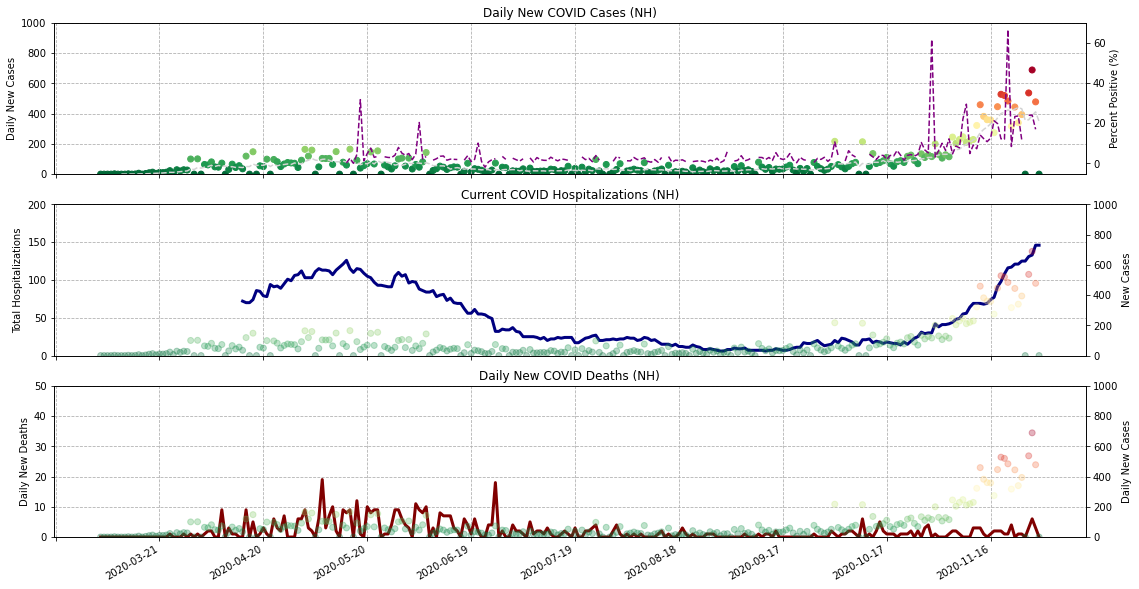

In [22]:
#GENERATE THE DASHBOARD - NEW HAMPSHIRE

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax4 = ax1.twinx()
ax5 = ax2.twinx()
ax6 = ax3.twinx()

cmap=mpl.cm.RdYlGn_r
norm=mpl.colors.Normalize(vmin=0, vmax=600)

ax1.scatter(dateNH, newCasesNH, c=newCasesNH, cmap=cmap, norm=norm)
ax1.plot(dateNH, longMovingAvgNH,  linestyle='--', color='lightgrey')
ax4.plot(dateNH, pctIndividualsPositiveNH, linestyle='--', color='purple')

ax2.plot(dateNH, currentHospitalizationsNH, linestyle='-', color='navy', linewidth=3)
ax5.scatter(dateNH, newCasesNH, c=newCasesNH, cmap=cmap, norm=norm, alpha=0.3)

ax3. plot(dateNH, dailyNewDeathsNH, linestyle='-', color='maroon', linewidth=3)
ax6.scatter(dateNH, newCasesNH, c=newCasesNH, cmap=cmap, norm=norm, alpha=0.3)

ax1.set_ylim(0,1000)
ax2.set_ylim(0,200)
ax3.set_ylim(0,50)
ax5.set_ylim(0,1000)
ax6.set_ylim(0,1000)

ax1.grid(True, linestyle='--')
ax2.grid(True, linestyle='--')
ax3.grid(True, linestyle='--')

ax1.set_title("Daily New COVID Cases (NH)")
ax2.set_title("Current COVID Hospitalizations (NH)")
ax3.set_title("Daily New COVID Deaths (NH)")

ax1.set_ylabel("Daily New Cases")
ax4.set_ylabel("Percent Positive (%)")
ax2.set_ylabel("Total Hospitalizations")
ax3.set_ylabel("Daily New Deaths")
ax5.set_ylabel("New Cases")
ax6.set_ylabel("Daily New Cases")

plt.gca().xaxis.set_major_locator(mpl.dates.DayLocator(interval=30))
fig.autofmt_xdate()

fig.set_size_inches(18.5, 10.5)

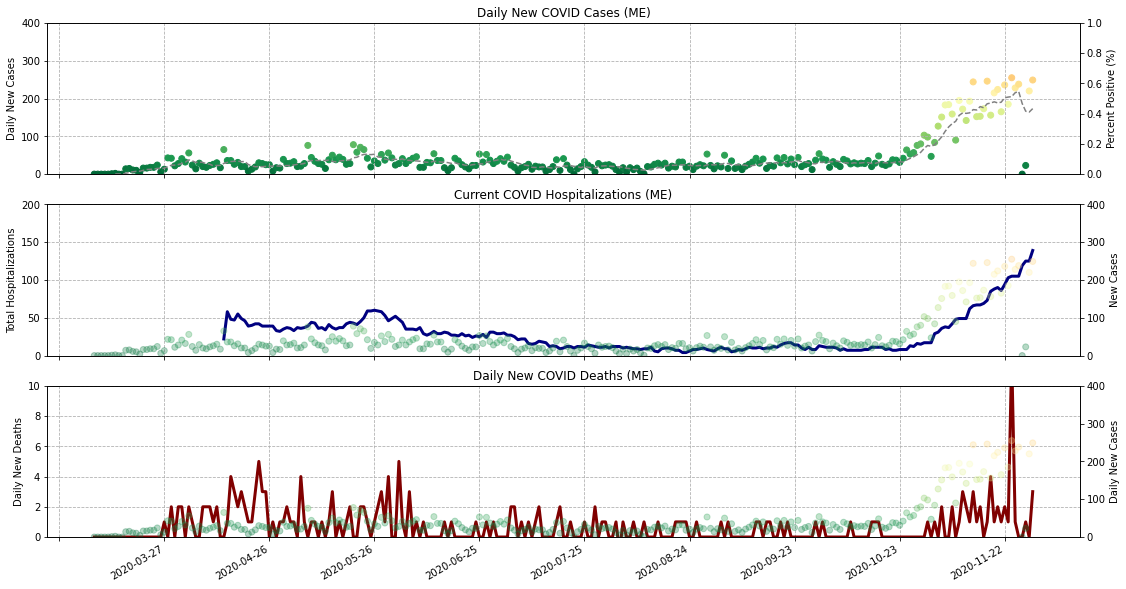

In [21]:
#GENERATE THE DASHBOARD - MAINE

fig, (ax1, ax2,  ax3) = plt.subplots(3, sharex=True)

ax4 = ax1.twinx()
ax5 = ax2.twinx()
ax6 = ax3.twinx()

cmap=mpl.cm.RdYlGn_r
norm=mpl.colors.Normalize(vmin=0, vmax=400)

ax1.scatter(dateME, newCasesME, c=newCasesME, cmap=cmap, norm=norm)
ax1.plot(dateME, longMovingAvgME, linestyle='--', color='grey')
##ADD IN PERCENT POSITIVITY##

ax2.plot(dateME, currentHospitalizationsME, linestyle='-', color='navy', linewidth=3)
ax5.scatter(dateME, newCasesME, c=newCasesME, cmap=cmap, norm=norm, alpha=0.3)

ax3.plot(dateME, dailyNewDeathsME, linestyle='-', color='maroon', linewidth=3)
ax6.scatter(dateME, newCasesME, c=newCasesME, cmap=cmap, norm=norm, alpha=0.3)

ax1.grid(True, linestyle='--')
ax2.grid(True, linestyle='--')
ax3.grid(True, linestyle='--')

ax1.set_title("Daily New COVID Cases (ME)")
ax2.set_title("Current COVID Hospitalizations (ME)")
ax3.set_title("Daily New COVID Deaths (ME)")

ax1.set_ylabel("Daily New Cases")
ax4.set_ylabel("Percent Positive (%)")
ax2.set_ylabel("Total Hospitalizations")
ax3.set_ylabel("Daily New Deaths")
ax5.set_ylabel("New Cases")
ax6.set_ylabel("Daily New Cases")

ax1.set_ylim(0, 400)
ax2.set_ylim(0,200)
ax3.set_ylim(0,10)
ax5.set_ylim(0,400)
ax6.set_ylim(0,400)

plt.gca().xaxis.set_major_locator(mpl.dates.DayLocator(interval=30))
fig.autofmt_xdate()

fig.set_size_inches(18.5, 10.5)

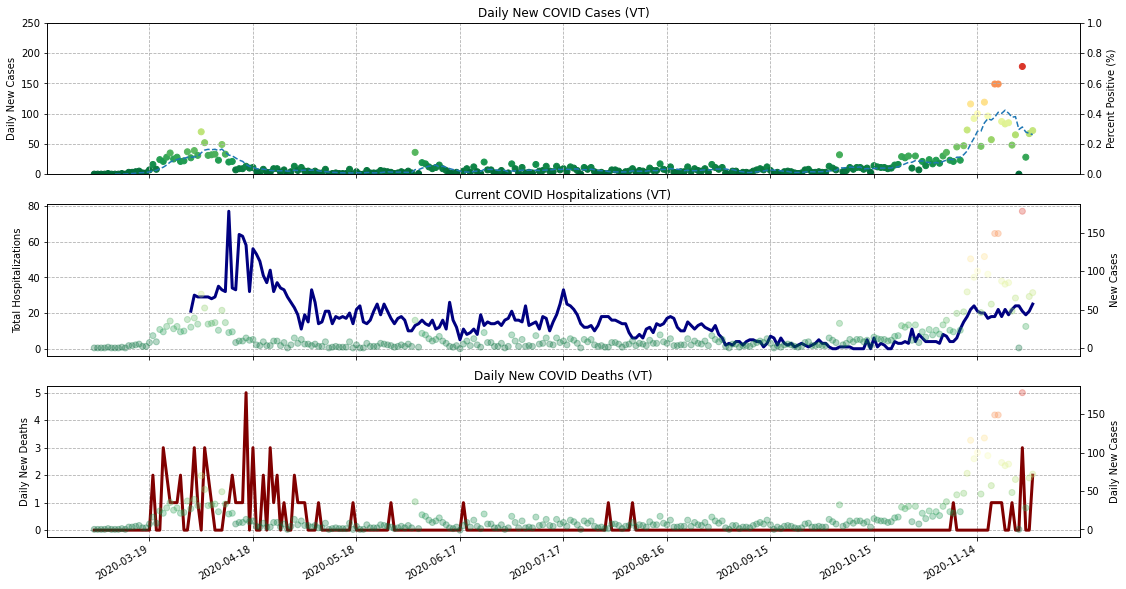

In [11]:
#GENERATE THE DASHBOARD - VERMONT

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax4 = ax1.twinx()
ax5 = ax2.twinx()
ax6 = ax3.twinx()

cmap=mpl.cm.RdYlGn_r
norm=mpl.colors.Normalize(vmin=0, vmax=200)

ax1.set_ylim(0, 250)

ax1.scatter(dateVT, newCasesVT, c=newCasesVT, cmap=cmap, norm=norm)
ax1.plot(dateVT, longMovingAvgVT, linestyle='--')

ax2.plot(dateVT, currentHospitalizationsVT, linestyle='-', color='navy', linewidth=3)
ax5.scatter(dateVT, newCasesVT, c=newCasesVT, cmap=cmap, norm=norm, alpha=0.3)

ax3.plot(dateVT, dailyNewDeathsVT, linestyle='-', color='maroon', linewidth=3)
ax6.scatter(dateVT, newCasesVT, c=newCasesVT, cmap=cmap, norm=norm, alpha=0.3)

ax1.grid(True, linestyle='--')
ax2.grid(True, linestyle='--')
ax3.grid(True, linestyle='--')

ax1.set_title("Daily New COVID Cases (VT)")
ax2.set_title("Current COVID Hospitalizations (VT)")
ax3.set_title("Daily New COVID Deaths (VT)")

ax1.set_ylabel("Daily New Cases")
ax4.set_ylabel("Percent Positive (%)")
ax2.set_ylabel("Total Hospitalizations")
ax3.set_ylabel("Daily New Deaths")
ax5.set_ylabel("New Cases")
ax6.set_ylabel("Daily New Cases")

plt.gca().xaxis.set_major_locator(mpl.dates.DayLocator(interval=30))
fig.autofmt_xdate()

fig.set_size_inches(18.5, 10.5)
